In [1]:
import pandas as pd
import librosa
import os
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

In [4]:
audiofiles = os.listdir("./dataset/LJSpeech-1.1/wavs/")
audiofiles = [ "./dataset/LJSpeech-1.1/wavs/"+ audio for audio in audiofiles ]

mfcc_feature = []
chroma_feature = []
spectral_contrast_feature = []
zero_crossing_rate_feature = []
spectral_centroid_feature = []

for audiofile in audiofiles:
    audio, sample_rate = librosa.load(audiofile, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio,sr=sample_rate)
    
    mfcc_feature.append(mfccs.mean(axis=1))
    chroma_feature.append(chroma.mean(axis=1))
    spectral_contrast_feature.append(spectral_contrast.mean(axis=1))
    spectral_centroid_feature.append(spectral_centroid.mean(axis=1))
    zero_crossing_rate_feature.append(zero_crossing_rate.mean())

print("Mfccs feature",mfcc_feature)
print("\nChroma feature",chroma_feature)
print("\nSpectral Contrast feature",spectral_contrast_feature)
print("\nZero Crossing Rate feature",zero_crossing_rate_feature)
print("\nSpectral Centroid feature",spectral_centroid_feature)

In [45]:
mfcc_feature_names = [f'mfcc_{i}' for i in range(1, 14)]
chroma_feature_names = [f'chroma_{i}' for i in range(1, len(chroma_feature[0])+1)]
spectral_contrast_feature_names = [f'spectral_contrast_{i}' for i in range(1, len(spectral_contrast_feature[0])+1)]
spectral_centroid_feature_names = [f'spectral_centroid_{i}' for i in range(1, len(spectral_centroid_feature[0])+1)]
mfcc_df = pd.DataFrame(mfcc_feature, columns=mfcc_feature_names)
chroma_df = pd.DataFrame(chroma_feature,columns=chroma_feature_names)
spectral_contrast_df = pd.DataFrame(spectral_contrast_feature,columns=spectral_contrast_feature_names)
zero_crossing_rate_df = pd.DataFrame({'zero_crossing_rate': zero_crossing_rate_feature})
spectral_centroid_df = pd.DataFrame(spectral_centroid_feature,columns=spectral_centroid_feature_names)

In [42]:
labels = [ f'Class{i}' for i in range(1,len(audiofiles)+1)]
mfcc_df['label'] = labels
chroma_df['label'] = labels
spectral_contrast_df['label'] = labels
zero_crossing_rate_df['label'] = labels
spectral_centroid_df['label'] = labels

In [43]:
with pd.ExcelWriter('./dataset/LJSpeech-1.1/features.xlsx', engine='xlsxwriter') as writer:
    mfcc_df.to_excel(writer,sheet_name="MFCCs",index=False,)
    chroma_df.to_excel(writer,sheet_name="Chroma",index=False)
    spectral_contrast_df.to_excel(writer,sheet_name="Spectral Contrast",index=False)
    zero_crossing_rate_df.to_excel(writer,sheet_name="Zero Crossing Rate",index=False)
    spectral_centroid_df.to_excel(writer,sheet_name="Spectral Centroid",index=False)

<hr>

In [2]:
mfcc_df = pd.read_excel("./dataset/LJSpeech-1.1/features.xlsx",sheet_name=['MFCCs'])
mfcc_df = pd.DataFrame(mfcc_df['MFCCs'])
mfcc_df.head()

mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0 -266.924683   71.077377   3.078800  10.006458 -20.212048 -28.229483   
1 -278.576599  117.861855 -11.425198   9.964253 -16.985825 -35.517025   
2 -259.459595   71.926460   2.981446   4.932605 -20.708271 -26.250685   
3 -288.346222   68.192131  -0.035026   9.272361 -20.900051 -22.940166   
4 -282.584656   77.032524   7.538936  19.448599 -13.619780 -35.118774   

      mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11   mfcc_12    mfcc_13  \
0 -30.380281 -16.709513  -9.092733  -7.320331 -27.194132 -1.872290 -13.931375   
1 -21.408199 -21.812050 -10.804782 -10.799911 -29.819855  1.317247 -20.849081   
2 -25.117359 -17.220787 -14.687505  -5.785794 -23.085520 -3.629827 -14.267406   
3 -28.637503 -18.823458 -13.990505  -5.227580 -28.797512 -2.529741 -12.567532   
4 -29.648624 -17.710569 -12.430393  -5.048242 -27.950790 -4.482507 -14.377147   

    label  
0  Class1  
1  Class2  
2  Class3  
3  Class4  
4  Class5

<Axes: >

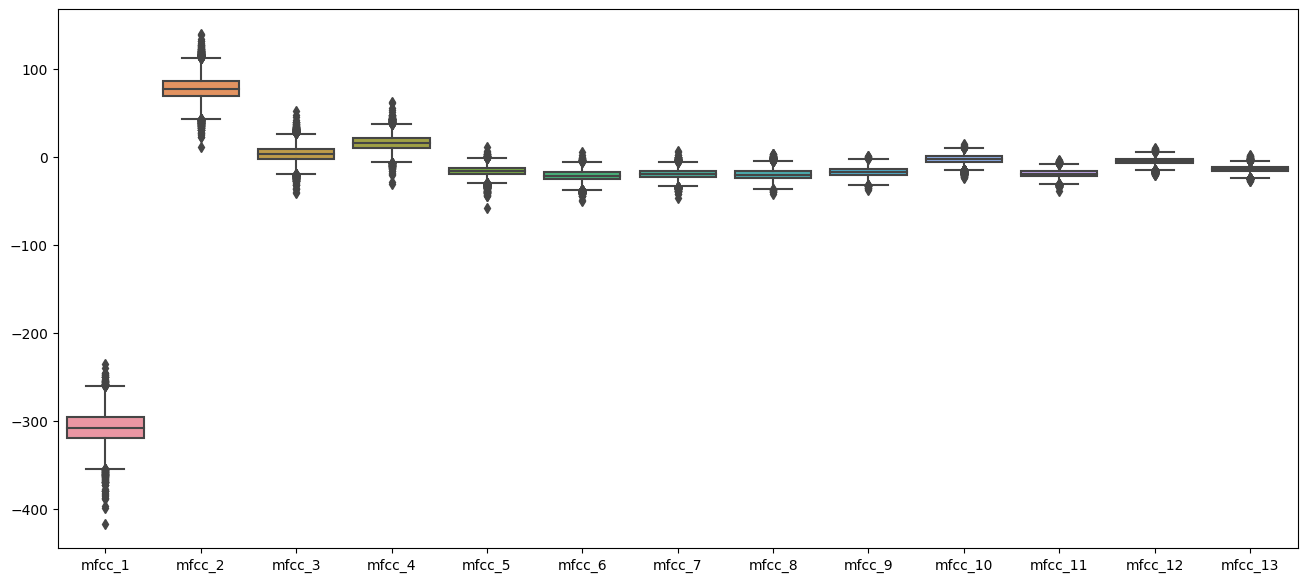

In [3]:
plt.figure(figsize = (16,7))
sns.boxplot(mfcc_df)

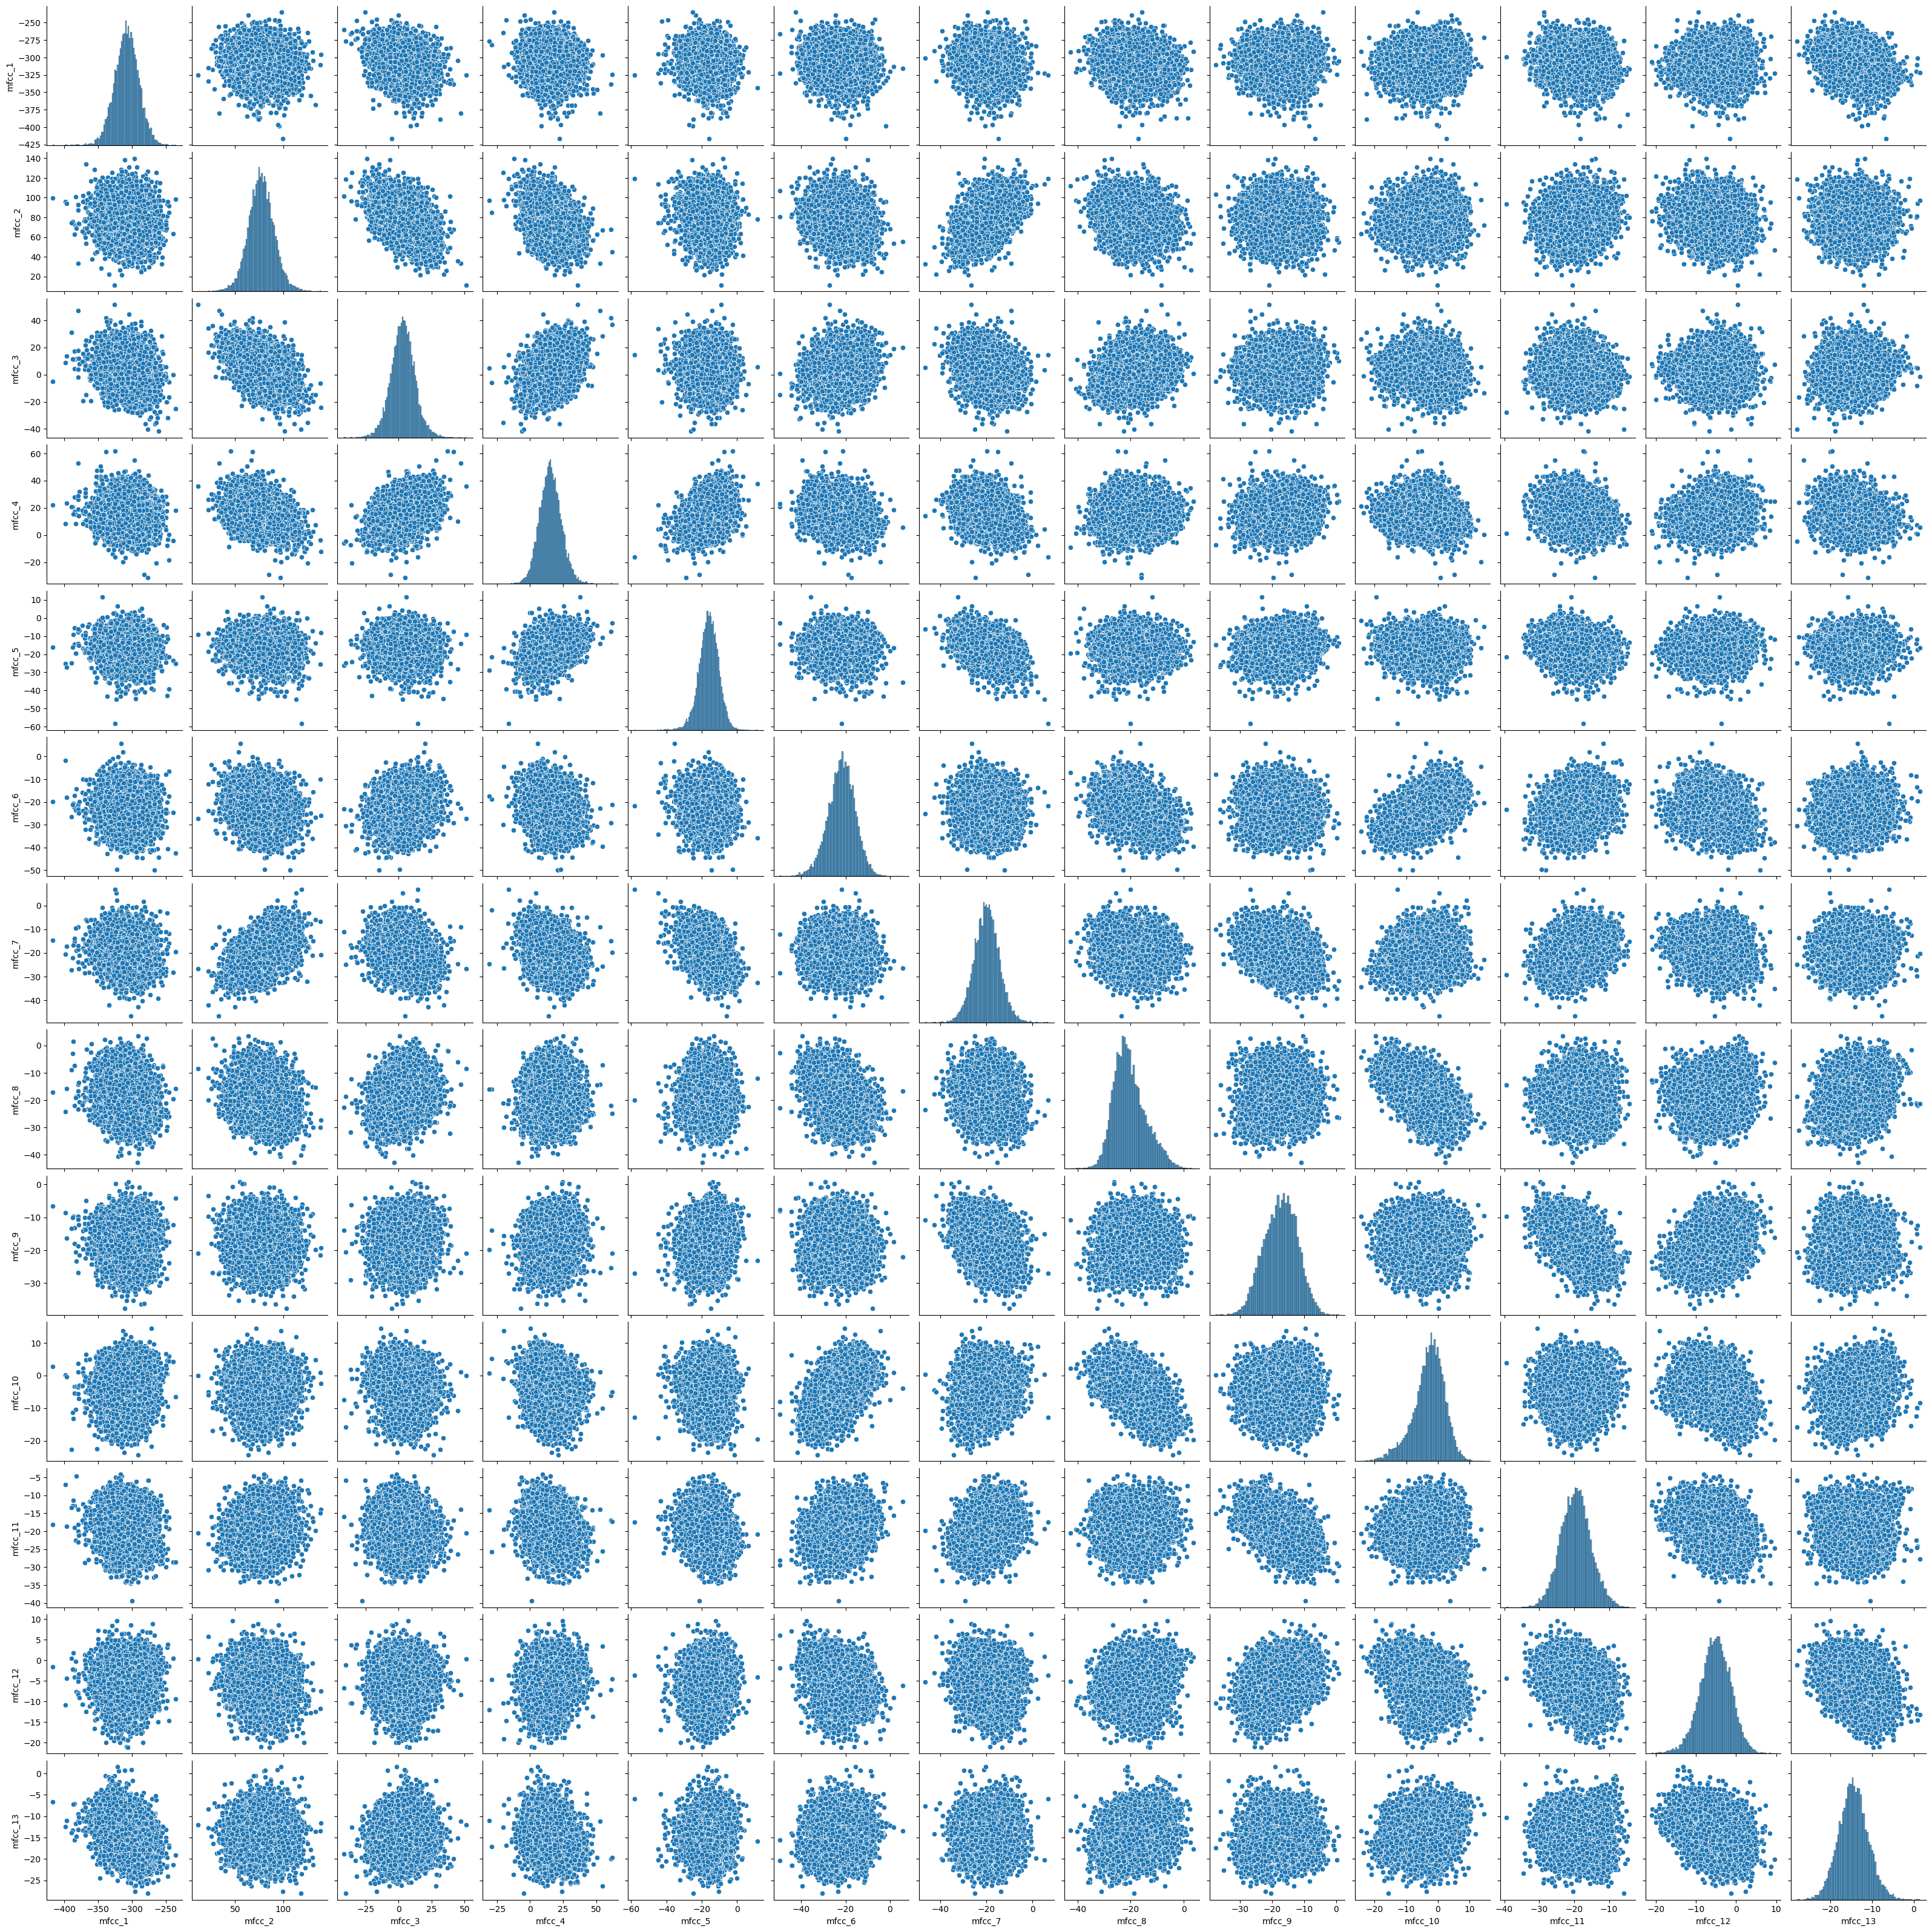

In [4]:
sns.pairplot(mfcc_df)

In [5]:
mfcc_corr = mfcc_df.corr(numeric_only=True)
mfcc_corr

mfcc_1    mfcc_2    mfcc_3    mfcc_4    mfcc_5    mfcc_6    mfcc_7  \
mfcc_1   1.000000 -0.115529 -0.191630 -0.005091 -0.067850 -0.024563 -0.115312   
mfcc_2  -0.115529  1.000000 -0.489195 -0.360031 -0.094112 -0.168292  0.451509   
mfcc_3  -0.191630 -0.489195  1.000000  0.342551 -0.033597  0.151126 -0.215127   
mfcc_4  -0.005091 -0.360031  0.342551  1.000000  0.320241 -0.157084 -0.234860   
mfcc_5  -0.067850 -0.094112 -0.033597  0.320241  1.000000  0.013112 -0.401573   
mfcc_6  -0.024563 -0.168292  0.151126 -0.157084  0.013112  1.000000  0.016338   
mfcc_7  -0.115312  0.451509 -0.215127 -0.234860 -0.401573  0.016338  1.000000   
mfcc_8  -0.195268 -0.104361  0.234383 -0.024045 -0.016255 -0.437079 -0.130369   
mfcc_9  -0.060992 -0.013260  0.028391  0.123939  0.122687 -0.115093 -0.354557   
mfcc_10  0.118018  0.033948 -0.152341 -0.135066  0.029914  0.534507  0.138342   
mfcc_11 -0.077292  0.099706 -0.050825 -0.150066 -0.153976  0.237825  0.334052   
mfcc_12  0.046898 -0.068895  0.050166  0.180812  0.002424 -0.304778 -0.085313   
mfcc_13 -0.263101  0.030080  0.078988 -0.219535  0.113191  0.141910 -0.007704   

           mfcc_8    mfcc_9   mfcc_10   mfcc_11   mfcc_12   mfcc_13  
mfcc_1  -0.195268 -0.060992  0.118018 -0.077292  0.046898 -0.263101  
mfcc_2  -0.104361 -0.013260  0.033948  0.099706 -0.068895  0.030080  
mfcc_3   0.234383  0.028391 -0.152341 -0.050825  0.050166  0.078988  
mfcc_4  -0.024045  0.123939 -0.135066 -0.150066  0.180812 -0.219535  
mfcc_5  -0.016255  0.122687  0.029914 -0.153976  0.002424  0.113191  
mfcc_6  -0.437079 -0.115093  0.534507  0.237825 -0.304778  0.141910  
mfcc_7  -0.130369 -0.354557  0.138342  0.334052 -0.085313 -0.007704  
mfcc_8   1.000000  0.155046 -0.592031 -0.080331  0.272192  0.203425  
mfcc_9   0.155046  1.000000 -0.050339 -0.575372  0.372188  0.139593  
mfcc_10 -0.592031 -0.050339  1.000000  0.066373 -0.416907  0.146558  
mfcc_11 -0.080331 -0.575372  0.066373  1.000000 -0.312529 -0.139859  
mfcc_12  0.272192  0.372188 -0.416907 -0.312529  1.000000 -0.222790  
mfcc_13  0.203425  0.139593  0.146558 -0.139859 -0.222790  1.000000

<Axes: >

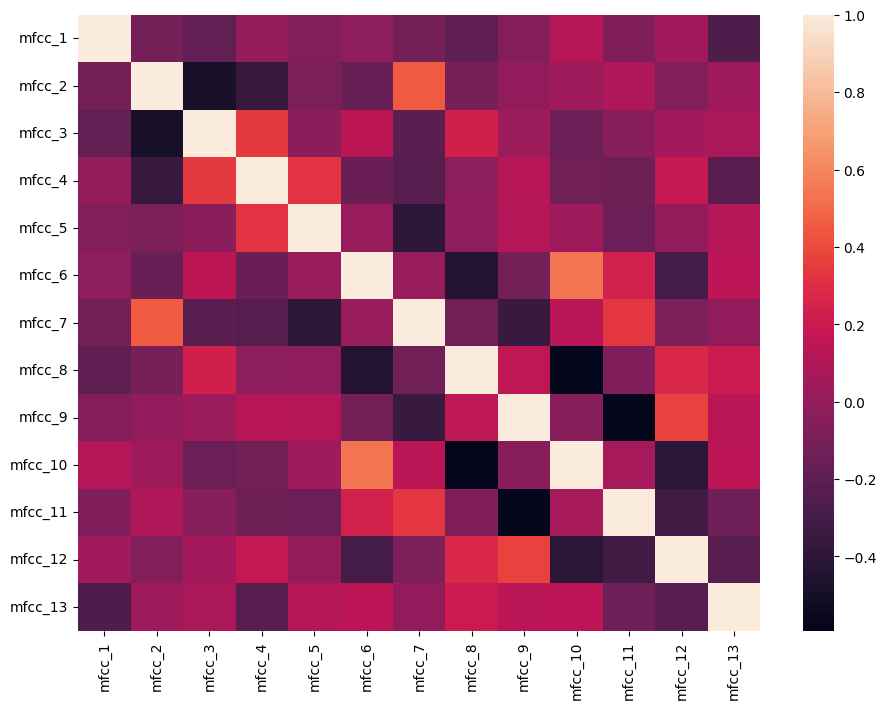

In [6]:
plt.figure(figsize=(11,8))
sns.heatmap(mfcc_corr)